In [2]:
# Load in the python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import pydotplus 

import sklearn.metrics as metrics
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Create the data frames
student_info_df = pd.read_csv('data/studentInfo.csv')


In [4]:
student_info_df.dropna(subset=['imd_band'], inplace=True)
student_info_df.reset_index(drop=True, inplace=True)
# drop widthdrawn
student_info_df = student_info_df[student_info_df.final_result != 'Withdrawn']

y = student_info_df[['final_result']]
# convert pass to 0 and fail to 1 and withdrawn to 2 and distinction to 3
y = y.replace(['Pass', 'Fail'], [0, 1])


# replace distinction with 0
y = y.replace(['Distinction'], [0])


# create a new data frame called x which might be used to predict the final result

x = student_info_df.drop(['final_result', 'id_student', 'code_presentation', 'code_module'], axis=1)

# convert the categorical data to numerical data for everything except studied_credits
le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])
x['disability'] = le.fit_transform(x['disability'])
#x['code_presentation'] = le.fit_transform(x['code_presentation'])
#x['code_module'] = le.fit_transform(x['code_module'])
x['imd_band'] = le.fit_transform(x['imd_band'])
x['age_band'] = le.fit_transform(x['age_band'])
x['region'] = le.fit_transform(x['region'])
x['highest_education'] = le.fit_transform(x['highest_education'])


# predicted = cross_val_score(clf, x, y, cv=10)
# print(predicted.mean())




In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [6]:
x.columns[2]


'highest_education'

Accuracy decision tree: 0.6811594202898551


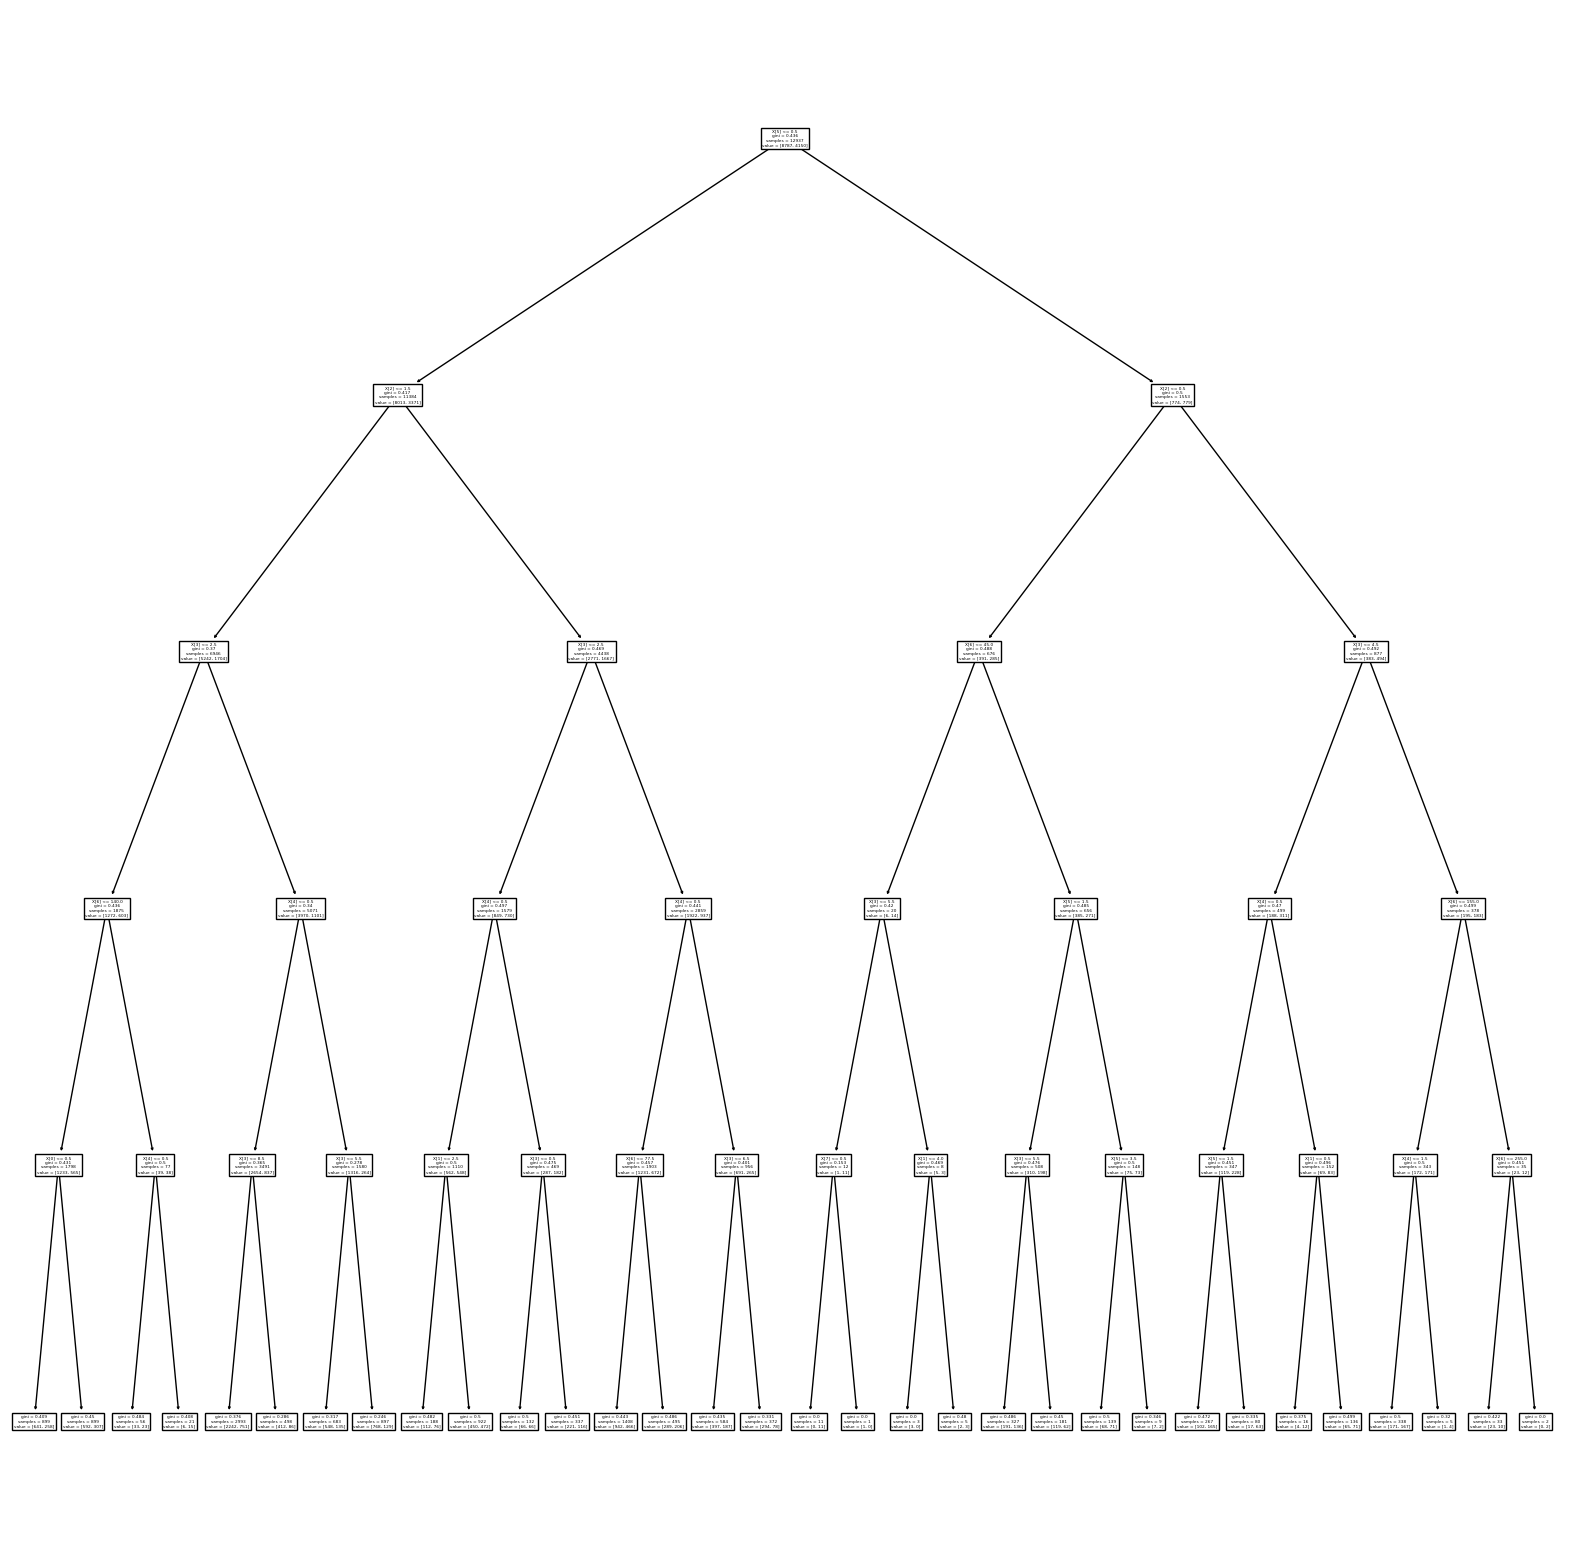

[learning_curve] Training set sizes: [  172   520   869  1217  1566  1914  2263  2611  2960  3308  3657  4005
  4354  4702  5051  5399  5748  6096  6445  6793  7142  7490  7839  8187
  8536  8884  9233  9581  9930 10278 10627 10975 11324 11672 12021 12369
 12718 13066 13415 13763 14112 14460 14809 15157 15506 15854 16203 16551
 16900 17249]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.4s finished


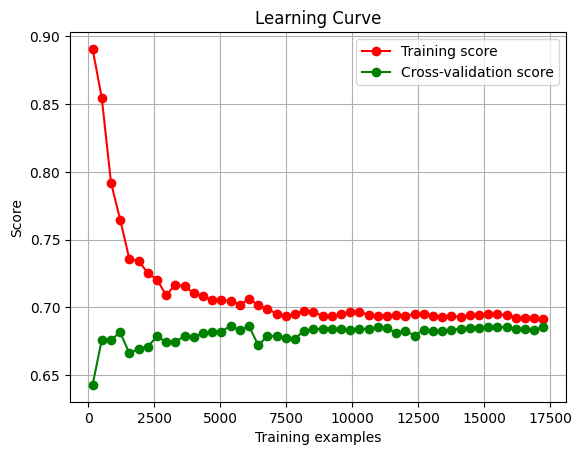

In [16]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train, cv=10)
print("Accuracy decision tree:", metrics.accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(clf, ax=ax)
plt.show()




train_sizes, train_scores, test_scores = learning_curve(clf, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1)

# plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [8]:
# use random forest classifier to predict the final result
clf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=0)
y_train = np.ravel(y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy random forest:", metrics.accuracy_score(y_test, y_pred))

Accuracy random forest: 0.6917874396135266


In [9]:
# use logistic regression to predict the final result
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(x_train, y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy logistic regression:", metrics.accuracy_score(y_test, y_pred))


Accuracy logistic regression: 0.6946859903381642


In [10]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
print("Accuracy knn:", metrics.accuracy_score(y_test, y_pred))

Accuracy knn: 0.6384541062801933


In [11]:
# use naive bayes to predict the final result
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy naive bayes:", metrics.accuracy_score(y_test, y_pred))

Accuracy naive bayes: 0.6796135265700483
